In [1]:
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt

def draw_graph(G, node_names={}, node_size=500):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=True, node_size=node_size, edge_color='gray', arrowsize=30)
    
    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)
        
    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
    
    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.show()

## Graph Factorization

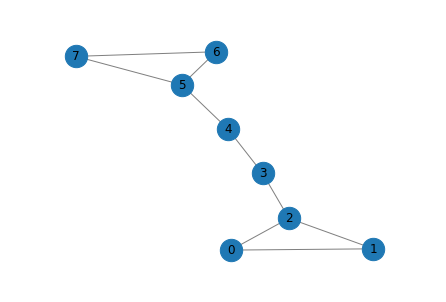

In [3]:
import networkx as nx

G = nx.barbell_graph(m1=3, m2=2)
draw_graph(G)


In [4]:
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)

C:\Users\IVANLI~1\AppData\Local\Temp/ipykernel_11084/1226159062.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


[WinError 2] The system cannot find the file specified
./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission
		Iter id: 0, Objective: 95.0064, f1: 95.0012, f2: 0.00522318


(array([[-0.00250848, -0.00634006],
        [-0.00250859, -0.00634187],
        [-0.00250908, -0.0063383 ],
        [-0.00249502, -0.00631048],
        [-0.00250646, -0.00633593],
        [-0.00250561, -0.00646006],
        [-0.00244728, -0.00617766],
        [-0.00279534, -0.00623292],
        [-0.00331918, -0.0081982 ],
        [-0.00319858, -0.00531324],
        [-0.00411953, -0.00211062],
        [-0.0044156 ,  0.00085701],
        [ 0.00240614, -0.00116439],
        [ 0.0044311 , -0.004215  ],
        [-0.00336161, -0.00987499],
        [-0.00336388, -0.00987348],
        [-0.0033595 , -0.00987445],
        [-0.00333003, -0.00989639],
        [-0.00342021, -0.00985827],
        [-0.00339562, -0.00989969],
        [-0.00356762, -0.00956805],
        [-0.00183873, -0.01038124],
        [-0.00470023, -0.0102979 ],
        [-0.00485834, -0.0141145 ]]),
 11.698240756988525)

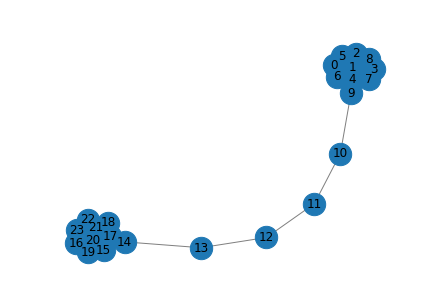

In [5]:
from gem.embedding.gf import GraphFactorization

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gf = GraphFactorization(d=2,  data_set=None,max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

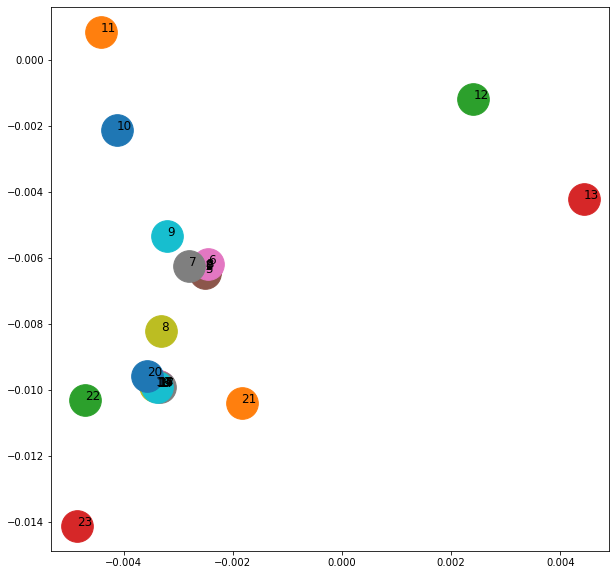

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = gf.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## GraphRep

C:\Users\IVANLI~1\AppData\Local\Temp/ipykernel_11084/1226159062.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


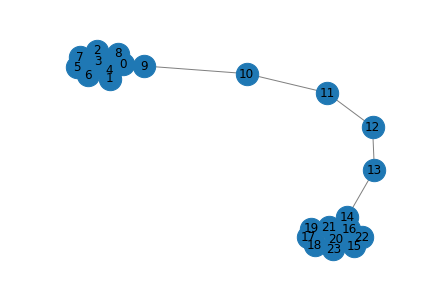

In [7]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.grarep import GraRep

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gr = GraRep(dimensions=2,order=3)
gr.fit(G)

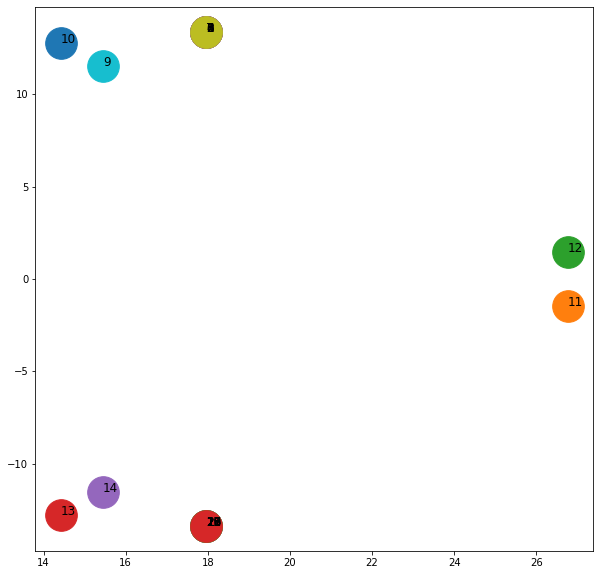

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 4
idb = 5
for x in G.nodes():
    
    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

## HOPE

SVD error (low rank): 0.052092


C:\Users\IVANLI~1\AppData\Local\Temp/ipykernel_11084/1226159062.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


(array([[ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07024409,  0.07024348,  0.07024409,  0.07024348],
        [ 0.07104037,  0.07104201,  0.07104037,  0.07104201],
        [ 0.00797181,  0.00799433,  0.00797181,  0.00799433],
        [ 0.00079628,  0.00099787,  0.00079628,  0.00099787],
        [-0.00079628,  0.00099787, -0.00079628,  0.00099787],
        [-0.00797181,  0.00799433, -0.00797181,  0.00799433],
        [-0.07104037,  0.07104201, -0.07104037,  0.07104201],
        [-0.07024409,  0.07024348, -0.07024409,  0.07024348],
        

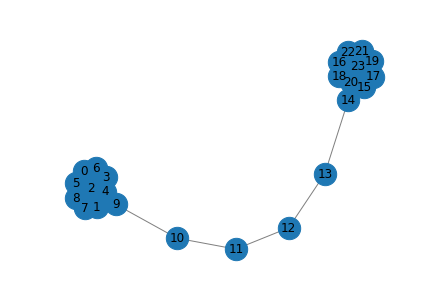

In [9]:
import networkx as nx
from gem.embedding.hope import HOPE

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

hp = HOPE(d=4, beta=0.01)
hp.learn_embedding(G)

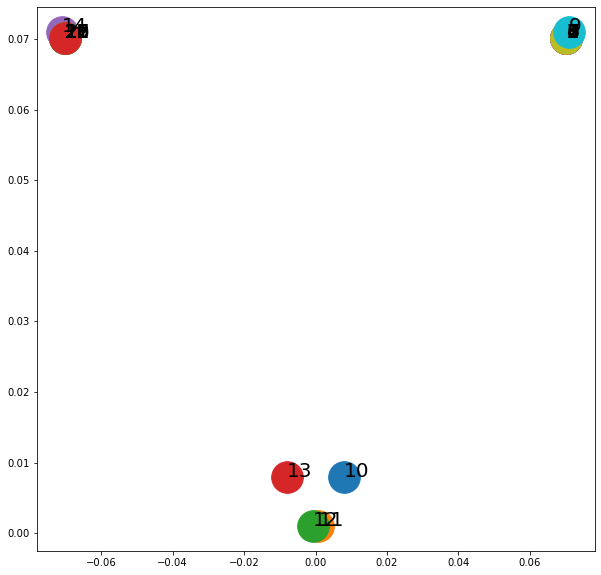

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = hp.get_embedding()[x,2:]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=20)

## DeepWalk

C:\Users\IVANLI~1\AppData\Local\Temp/ipykernel_11084/1226159062.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


TypeError: __init__() got an unexpected keyword argument 'iter'

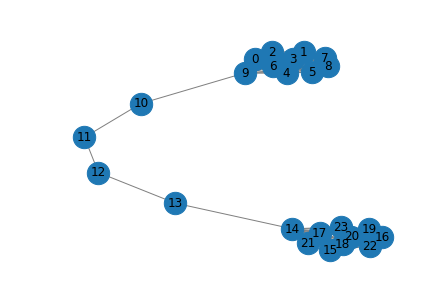

In [11]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

dw = DeepWalk(dimensions=2)
dw.fit(G)

AttributeError: 'DeepWalk' object has no attribute '_embedding'

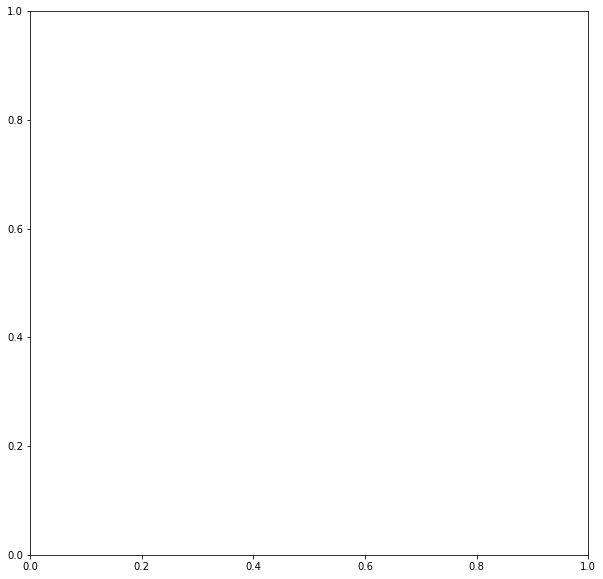

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = dw.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

## Node2Vec

C:\Users\IVANLI~1\AppData\Local\Temp/ipykernel_11084/1226159062.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.53it/s]


TypeError: __init__() got an unexpected keyword argument 'size'

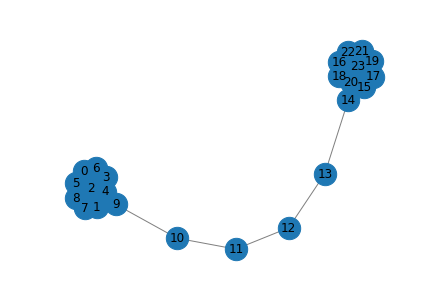

In [13]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

NameError: name 'model' is not defined

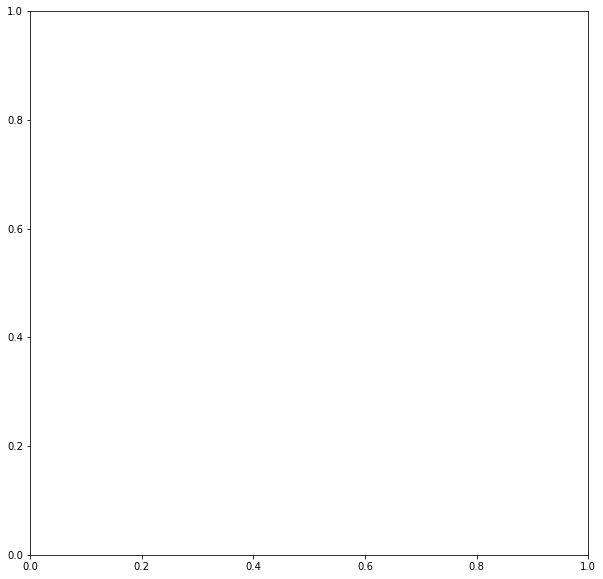

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():
    
    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Edge2Vec

In [15]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

NameError: name 'model' is not defined

NameError: name 'edges_embs' is not defined

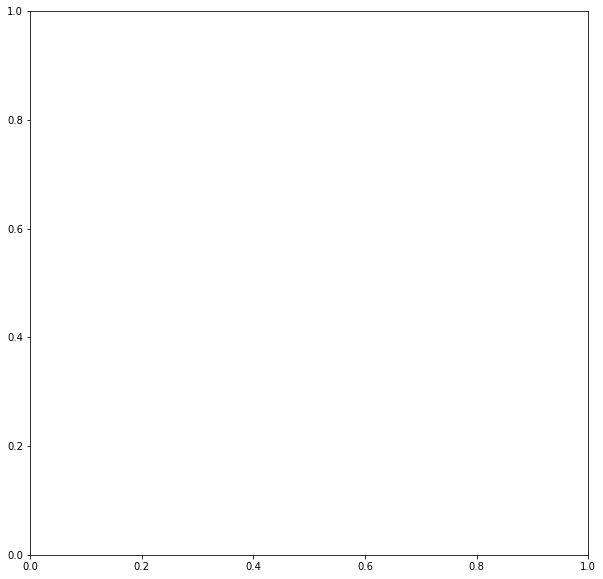

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():
    
    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

## Graph2Vec

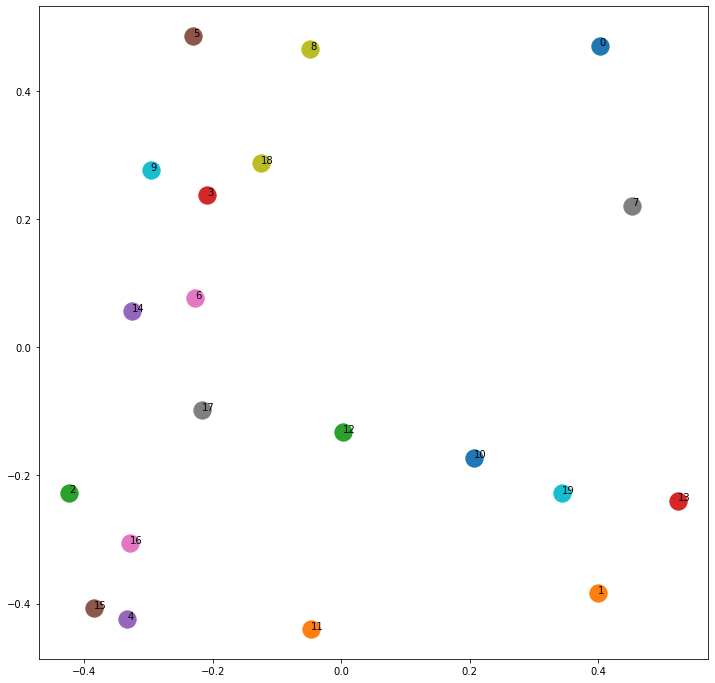

In [17]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(12,12))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=300)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=10)